# <span style="color:forestgreen">Superstore Sales Analysis</span>

## Exploring The Data

In [1]:
%pip install kagglehub matplotlib

Note: you may need to restart the kernel to use updated packages.


### Importing Packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\HomePC\Documents\School\anaconda_projects\Programs\Project Data Sci & Analytics\train.csv")

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [5]:
df.info(_)

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

### Filling Null values

In [ ]:
df["Postal Code"].fillna(0,  inplace = True)
df ["Postal Code"] = df["Postal Code"].astype(int)

C:\Users\HomePC\AppData\Local\Temp\ipykernel_27404\2039719930.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Postal Code"].fillna(0,  inplace = True)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

### Checking for Duplicates

In [11]:
if df.duplicated().sum() > 0: #
    print("Duplicate exists")
else:
    print("Doesn't Exist")

Doesn't Exist


In [6]:
df.head(100)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,US-2018-109484,06/11/2018,12/11/2018,Standard Class,RB-19705,Roger Barcio,Home Office,United States,Portland,Oregon,97206.0,West,OFF-BI-10004738,Office Supplies,Binders,Flexible Leather- Look Classic Collection Ring...,5.6820
96,97,CA-2018-161018,09/11/2018,11/11/2018,Second Class,PN-18775,Parhena Norris,Home Office,United States,New York City,New York,10009.0,East,FUR-FU-10000629,Furniture,Furnishings,9-3/4 Diameter Round Wall Clock,96.5300
97,98,CA-2018-157833,17/06/2018,20/06/2018,First Class,KD-16345,Katherine Ducich,Consumer,United States,San Francisco,California,94122.0,West,OFF-BI-10001721,Office Supplies,Binders,Trimflex Flexible Post Binders,51.3120
98,99,CA-2017-149223,06/09/2017,11/09/2017,Standard Class,ER-13855,Elpida Rittenbach,Corporate,United States,Saint Paul,Minnesota,55106.0,Central,OFF-AP-10000358,Office Supplies,Appliances,Fellowes Basic Home/Office Series Surge Protec...,77.8800


## Revenue by Customer Segment
- Will help us understand our largest buyers and also improve our customer service to each segment.
- How we can improve customer services to them and ensure customer loyalty and satisfication throught the year.

### Types of Customers

In [7]:
types_of_customers = df['Segment'].unique()
print (types_of_customers)

['Consumer' 'Corporate' 'Home Office']


In [8]:
number_of_customers = df['Segment'].value_counts().reset_index()
number_of_customers = number_of_customers.rename(columns={'Segment' : 'Type Of Customer'})
print (number_of_customers)

  Type Of Customer  count
0         Consumer   5101
1        Corporate   2953
2      Home Office   1746


### Visualize the distribution of different types of customers.

([<matplotlib.patches.Wedge at 0x240c9754bf0>,
 [Text(-0.07082911608159113, 1.0977172843292122, 'Consumer'),
  Text(-0.5228074775852011, -0.9678183411059121, 'Corporate'),
  Text(0.9321462996405261, -0.584040474681742, 'Home Office')],
 [Text(-0.03863406331723152, 0.5987548823613884, '52.1%'),
  Text(-0.28516771504647326, -0.5279009133304975, '30.1%'),
  Text(0.5084434361675596, -0.31856753164458657, '17.8%')])

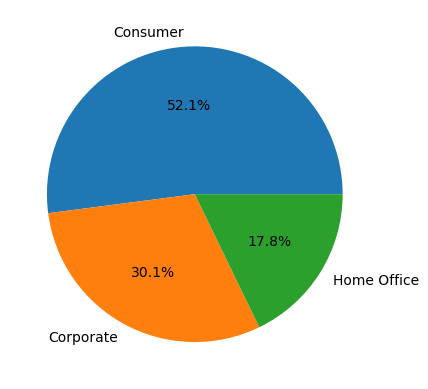

In [9]:
plt.pie(number_of_customers['count'], labels=number_of_customers['Type Of Customer'], autopct='%1.1f%%')
     

## Customer Sales Insights
1. Understanding Customer Need

2. Improving Customer Engagement
3. Bridging Marketing and Sales

4. Enhancing Efficiency: By understanding customer behavior and preferences, you can streamline your processes, making them more efficient and reducing wasted efforts.

5. Building Realistic Expectations: Insights help in setting realistic expectations around your products and services,

In [12]:
sales_per_segment = df.groupby('Segment')['Sales'].sum().reset_index()
sales_per_segment = sales_per_segment.rename(columns={'Segment' : 'Type Of Customer', 'Sales' : 'Total Sales'})

print(sales_per_segment)

  Type Of Customer   Total Sales
0         Consumer  1.148061e+06
1        Corporate  6.884941e+05
2      Home Office  4.249822e+05


<BarContainer object of 3 artists>

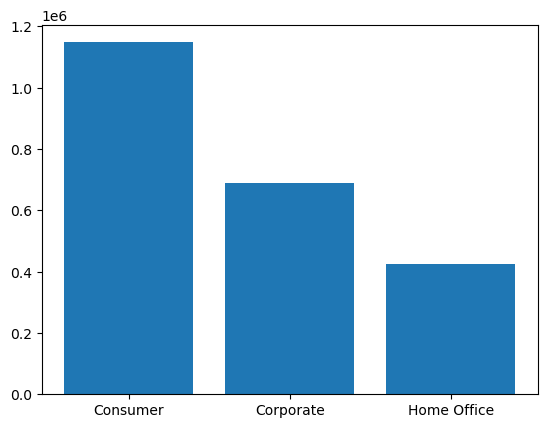

In [13]:
plt.bar(sales_per_segment['Type Of Customer'], sales_per_segment['Total Sales'])

([<matplotlib.patches.Wedge at 0x240c997a9c0>,
 [Text(-0.02642083976554102, 1.0996826538715994, 'Consumer'),
  Text(-0.5902005886829921, -0.9282581888236967, 'Corporate'),
  Text(0.913814451312435, -0.612326014940206, 'Home Office')],
 [Text(-0.014411367144840556, 0.5998269021117814, '50.8%'),
  Text(-0.3219275938270865, -0.5063226484492891, '30.4%'),
  Text(0.49844424617041905, -0.33399600814920327, '18.8%')])

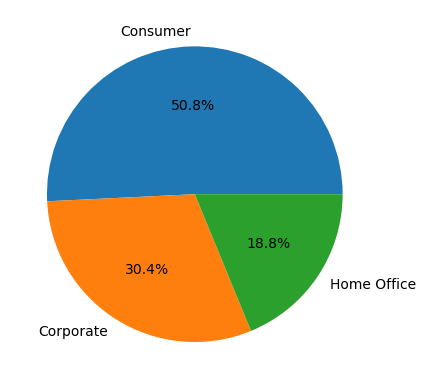

In [14]:
plt.pie(sales_per_segment['Total Sales'], labels=sales_per_segment['Type Of Customer'], autopct='%1.1f%%')

In [15]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


## Exploring Customer Loyalty

### The Customers Info Table

In [24]:
customers_order_frequency = df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Order ID'].count().reset_index()
customers_order_frequency.rename(columns={'Order ID' : 'Total Orders'}, inplace = True)

print(customers_order_frequency)

    Customer ID       Customer Name    Segment  Total Orders
0      AA-10315          Alex Avila   Consumer            11
1      AA-10375        Allen Armold   Consumer            15
2      AA-10480        Andrew Allen   Consumer            12
3      AA-10645       Anna Andreadi   Consumer            18
4      AB-10015       Aaron Bergman   Consumer             6
..          ...                 ...        ...           ...
788    XP-21865        Xylona Preis   Consumer            28
789    YC-21895      Yoseph Carroll  Corporate             8
790    YS-21880       Yana Sorensen  Corporate            12
791    ZC-21910    Zuschuss Carroll   Consumer            31
792    ZD-21925  Zuschuss Donatelli   Consumer             9

[793 rows x 4 columns]


### Customers Segment with The Highest Orders

In [25]:
repeat_customers = customers_order_frequency[customers_order_frequency['Total Orders'] >= 1]
repeat_customers_sorted = repeat_customers.sort_values(by='Total Orders', ascending = False)

print(repeat_customers_sorted.head(20).reset_index(drop=True))

   Customer ID        Customer Name      Segment  Total Orders
0     WB-21850        William Brown     Consumer            35
1     PP-18955           Paul Prost  Home Office            34
2     MA-17560         Matt Abelman  Home Office            34
3     JL-15835             John Lee     Consumer            33
4     CK-12205  Chloris Kastensmidt     Consumer            32
5     SV-20365          Seth Vernon     Consumer            32
6     JD-15895     Jonathan Doherty    Corporate            32
7     AP-10915       Arthur Prichep     Consumer            31
8     ZC-21910     Zuschuss Carroll     Consumer            31
9     EP-13915           Emily Phan     Consumer            31
10    LC-16870        Lena Cacioppo     Consumer            30
11    Dp-13240          Dean percer  Home Office            29
12    BM-11650           Brian Moss    Corporate            29
13    GT-14710            Greg Tran     Consumer            29
14    KL-16645         Ken Lonsdale     Consumer       

### Customer grouped by Sales

In [26]:
customer_sales = df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Sales'].sum().reset_index()
print(customer_sales)

    Customer ID       Customer Name    Segment     Sales
0      AA-10315          Alex Avila   Consumer  5563.560
1      AA-10375        Allen Armold   Consumer  1056.390
2      AA-10480        Andrew Allen   Consumer  1790.512
3      AA-10645       Anna Andreadi   Consumer  5086.935
4      AB-10015       Aaron Bergman   Consumer   886.156
..          ...                 ...        ...       ...
788    XP-21865        Xylona Preis   Consumer  2374.658
789    YC-21895      Yoseph Carroll  Corporate  5454.350
790    YS-21880       Yana Sorensen  Corporate  6720.444
791    ZC-21910    Zuschuss Carroll   Consumer  8025.707
792    ZD-21925  Zuschuss Donatelli   Consumer  1493.944

[793 rows x 4 columns]


### Top Spenders

In [27]:

top_spenders = customer_sales.sort_values(by='Sales', ascending=False)
print(top_spenders.head(12).reset_index(drop=True))

   Customer ID       Customer Name      Segment      Sales
0     SM-20320         Sean Miller  Home Office  25043.050
1     TC-20980        Tamara Chand    Corporate  19052.218
2     RB-19360        Raymond Buch     Consumer  15117.339
3     TA-21385        Tom Ashbrook  Home Office  14595.620
4     AB-10105       Adrian Barton     Consumer  14473.571
5     KL-16645        Ken Lonsdale     Consumer  14175.229
6     SC-20095        Sanjit Chand     Consumer  14142.334
7     HL-15040        Hunter Lopez     Consumer  12873.298
8     SE-20110        Sanjit Engle     Consumer  12209.438
9     CC-12370  Christopher Conant     Consumer  12129.072
10    TS-21370        Todd Sumrall    Corporate  11891.751
11    GT-14710           Greg Tran     Consumer  11820.120


## Superstore Shipping Strategies

In [28]:
types_of_customers = df['Ship Mode'].unique()
print(types_of_customers)

['Second Class' 'Standard Class' 'First Class' 'Same Day']


In [29]:
shipping_model = df['Ship Mode'].value_counts().reset_index()
shipping_model = shipping_model.rename(columns={'index':'Use Frequency', 'Ship Mode':'Mode Of Shipment', 'count' : 'Use Frequency'})
print(shipping_model)

  Mode Of Shipment  Use Frequency
0   Standard Class           5859
1     Second Class           1902
2      First Class           1501
3         Same Day            538


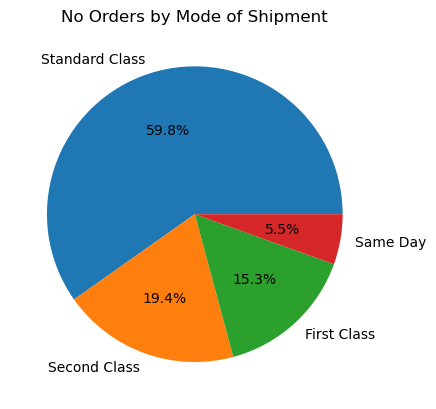

In [30]:
plt.pie(shipping_model['Use Frequency'], labels=shipping_model['Mode Of Shipment'], autopct='%1.1f%%')
plt.title('No Orders by Mode of Shipment')
plt.show()     

## Georgraphical Market Analysis

### Orders by State

In [31]:
state = df['State'].value_counts().reset_index()
state = state.rename(columns={'index':'State', 'State':'Number Of Customers'})
print(state.head(20))

   Number Of Customers  count
0           California   1946
1             New York   1097
2                Texas    973
3         Pennsylvania    582
4           Washington    504
5             Illinois    483
6                 Ohio    454
7              Florida    373
8             Michigan    253
9       North Carolina    247
10            Virginia    224
11             Arizona    223
12           Tennessee    183
13            Colorado    179
14             Georgia    177
15            Kentucky    137
16             Indiana    135
17       Massachusetts    135
18              Oregon    122
19          New Jersey    122


### Orders by City

In [32]:
city = df['City'].value_counts().reset_index()
city.head(25)

,City,count
0,New York City,891
1,Los Angeles,728
2,Philadelphia,532
3,San Francisco,500
4,Seattle,426
5,Houston,374
6,Chicago,308
7,Columbus,221
8,San Diego,170
9,Springfield,161


### Top Sales by City

In [33]:
city_sales = df.groupby(['City'])['Sales'].sum().reset_index()
top_city_sales = city_sales.sort_values (by='Sales', ascending=False)
top_city_sales.head(10).reset_index(drop=True)

,City,Sales
0,New York City,252462.5470
1,Los Angeles,173420.1810
2,Seattle,116106.3220
3,San Francisco,109041.1200
4,Philadelphia,108841.7490
5,Houston,63956.1428
6,Chicago,47820.1330
7,San Diego,47521.0290
8,Jacksonville,44713.1830
9,Detroit,42446.9440


### Bottom Sales by City

In [34]:
bottom_city_sales = city_sales.sort_values (by='Sales', ascending=True)
bottom_city_sales.head(10).reset_index(drop=True)

,City,Sales
0,Abilene,1.392
1,Elyria,1.824
2,Jupiter,2.064
3,Pensacola,2.214
4,Ormond Beach,2.808
5,San Luis Obispo,3.620
6,Springdale,4.300
7,Layton,4.960
8,Keller,6.000
9,Missouri City,6.370


### Top Sales by State

In [35]:
state_sales = df.groupby(['State'])['Sales'].sum().reset_index()
top_sales = state_sales.sort_values(by='Sales', ascending=False)
top_sales.head(10).reset_index(drop=True)

,State,Sales
0,California,446306.4635
1,New York,306361.1470
2,Texas,168572.5322
3,Washington,135206.8500
4,Pennsylvania,116276.6500
5,Florida,88436.5320
6,Illinois,79236.5170
7,Michigan,76136.0740
8,Ohio,75130.3500
9,Virginia,70636.7200


### Bottom Sales by State

In [36]:
bottom_sales = state_sales.sort_values(by='Sales', ascending=True)
bottom_sales.head(10).reset_index(drop=True)

,State,Sales
0,North Dakota,919.910
1,West Virginia,1209.824
2,Maine,1270.530
3,South Dakota,1315.560
4,Wyoming,1603.136
5,District of Columbia,2865.020
6,Kansas,2914.310
7,Idaho,4382.486
8,Iowa,4443.560
9,New Mexico,4783.522


### State-City Sales

In [37]:
state_city_sales = df.groupby(['State', 'City'])['Sales'].sum().reset_index()
print(state_city_sales.head(20))

      State           City      Sales
0   Alabama         Auburn   1766.830
1   Alabama        Decatur   3374.820
2   Alabama       Florence   1997.350
3   Alabama         Hoover    525.850
4   Alabama     Huntsville   2484.370
5   Alabama         Mobile   5462.990
6   Alabama     Montgomery   3722.730
7   Alabama     Tuscaloosa    175.700
8   Arizona       Avondale    946.808
9   Arizona  Bullhead City     22.288
10  Arizona       Chandler   1067.403
11  Arizona        Gilbert   4172.382
12  Arizona       Glendale   2917.865
13  Arizona           Mesa   4037.740
14  Arizona         Peoria   1341.352
15  Arizona        Phoenix  11000.257
16  Arizona     Scottsdale   1466.307
17  Arizona   Sierra Vista     76.072
18  Arizona          Tempe   1070.302
19  Arizona         Tucson   6313.016


## Product Performance Insight

### Category of Products

In [38]:
products = df['Category'].unique()
print(products)

['Furniture' 'Office Supplies' 'Technology']


### List of  Sub-Category

In [39]:
product_subcategory = df['Sub-Category'].unique()
print(product_subcategory)     

['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


### Total Sub-Category for @ Category

In [40]:
subcategory_count = df.groupby('Category')['Sub-Category'].nunique().reset_index()
subcategory_count = subcategory_count.sort_values(by='Sub-Category', ascending = False)
print(subcategory_count)

          Category  Sub-Category
1  Office Supplies             9
0        Furniture             4
2       Technology             4


### Sales by Category & Sub- Category

In [41]:
subcategory_count_sales = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()
subcategory_count_sales = subcategory_count_sales.sort_values(by='Sales', ascending = False)

print(subcategory_count_sales)

           Category Sub-Category        Sales
16       Technology       Phones  327782.4480
1         Furniture       Chairs  322822.7310
11  Office Supplies      Storage  219343.3920
3         Furniture       Tables  202810.6280
6   Office Supplies      Binders  200028.7850
15       Technology     Machines  189238.6310
13       Technology  Accessories  164186.7000
14       Technology      Copiers  146248.0940
0         Furniture    Bookcases  113813.1987
4   Office Supplies   Appliances  104618.4030
2         Furniture  Furnishings   89212.0180
10  Office Supplies        Paper   76828.3040
12  Office Supplies     Supplies   46420.3080
5   Office Supplies          Art   26705.4100
7   Office Supplies    Envelopes   16128.0460
9   Office Supplies       Labels   12347.7260
8   Office Supplies    Fasteners    3001.9600


### Top Sales by Category

In [42]:

product_category = df.groupby(['Category'])['Sales'].sum().reset_index()
top_product_category = product_category.sort_values(by='Sales', ascending = False)
print(top_product_category.reset_index(drop=True))

          Category        Sales
0       Technology  827455.8730
1        Furniture  728658.5757
2  Office Supplies  705422.3340


### Sales by Category visual

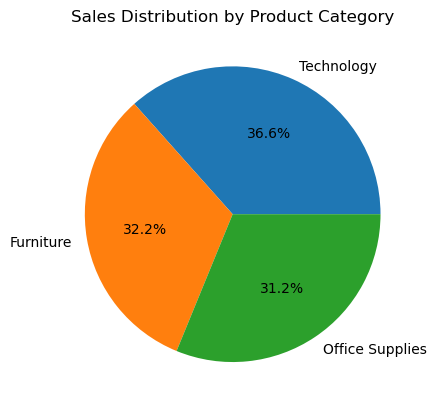

In [43]:
plt.pie(top_product_category['Sales'], labels=top_product_category['Category'], autopct='%1.1f%%')
plt.title('Sales Distribution by Product Category')
plt.show()


### Sales by Sub-Caregory Visual

Text(0.5, 1.0, 'Sales Distribution by Product Sub-Category')

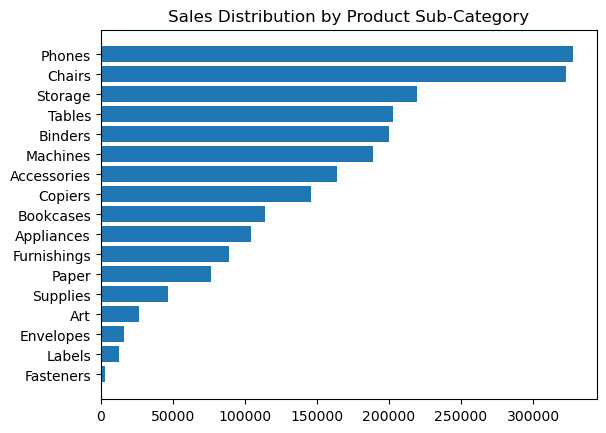

In [44]:
subcategory_count_sales = subcategory_count_sales.sort_values(by='Sales', ascending = True)
plt.barh(subcategory_count_sales['Sub-Category'], subcategory_count_sales['Sales'])
plt.title('Sales Distribution by Product Sub-Category')

## Comprehensive  Sales Analysis

In [45]:

df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst = True)
yearly_sales = df.groupby(df['Order Date'].dt.year)['Sales'].sum()
yearly_sales = yearly_sales.reset_index()
yearly_sales = yearly_sales.rename(columns={'Order Date' : 'Year', 'Sales': 'Total Sales'})

yearly_sales.head()

,Year,Total Sales
0,2015,479856.2081
1,2016,459436.0054
2,2017,600192.5500
3,2018,722052.0192


Text(0.5, 1.0, 'Total sales by Year')

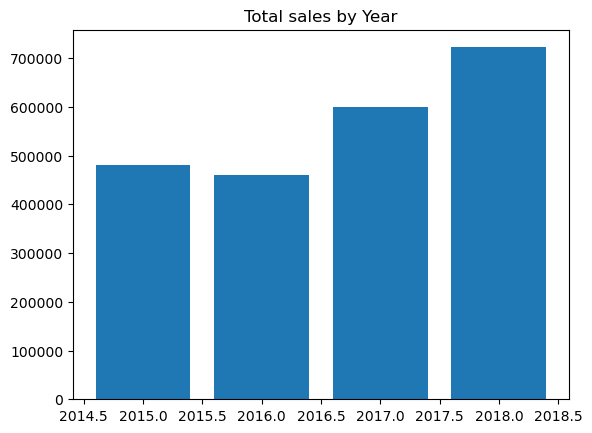

In [46]:

plt.bar(yearly_sales['Year'], yearly_sales['Total Sales'])
plt.title('Total sales by Year')


## Tracking Sales Analysis

### Yearly sales

Text(0.5, 1.0, 'Total sales by Year')

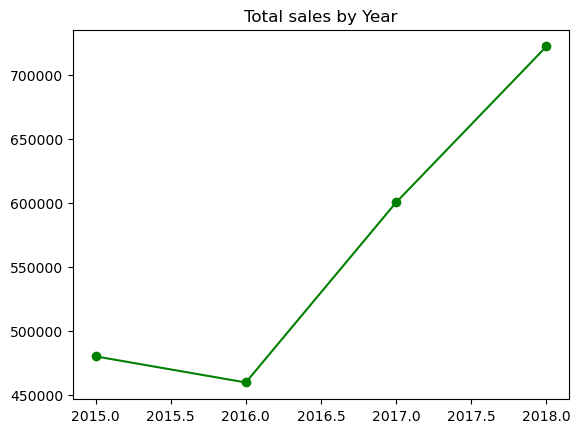

In [47]:
plt.plot(yearly_sales['Year'], yearly_sales['Total Sales'], marker='o', linestyle='-',color= 'green')
plt.title('Total sales by Year')

### Total Quartely Sales

In [48]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
year_sales = df[df['Order Date'].dt.year == 2018]
quarterly_sales = year_sales.resample('Q', on='Order Date')['Sales'].sum()
quarterly_sales = quarterly_sales.reset_index()
quarterly_sales = quarterly_sales.rename(columns = {'Order Date': 'Quarter', 'Sales' : 'Total Sales'})

quarterly_sales.head()

C:\Users\HomePC\AppData\Local\Temp\ipykernel_32580\3916797278.py:3: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_sales = year_sales.resample('Q', on='Order Date')['Sales'].sum()


,Quarter,Total Sales
0,2018-03-31,122260.8842
1,2018-06-30,127558.6200
2,2018-09-30,193815.8400
3,2018-12-31,278416.6750


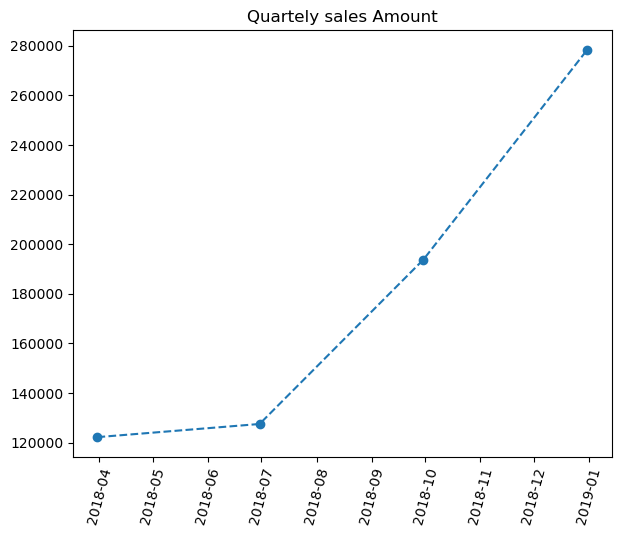

In [49]:
plt.plot(quarterly_sales['Quarter'], quarterly_sales['Total Sales'], marker = 'o', linestyle = '--')

plt.tight_layout()
plt.xticks(rotation=75)
plt.title('Quartely sales Amount')
plt.show()

### Monthly Sales

In [50]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst = True)
yearly_sales = df[df['Order Date'].dt.year == 2018]
monthly_sales = yearly_sales.resample('M', on = 'Order Date')['Sales'].sum()
monthly_sales = monthly_sales.reset_index()
monthly_sales = monthly_sales.rename(columns={'Order Date':'Month', 'Sales' : 'Total Monthly Sales'})

monthly_sales.head

C:\Users\HomePC\AppData\Local\Temp\ipykernel_32580\488581346.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = yearly_sales.resample('M', on = 'Order Date')['Sales'].sum()


<bound method NDFrame.head of         Month  Total Monthly Sales
0  2018-01-31           43476.4740
1  2018-02-28           19920.9974
2  2018-03-31           58863.4128
3  2018-04-30           35541.9101
4  2018-05-31           43825.9822
5  2018-06-30           48190.7277
6  2018-07-31           44825.1040
7  2018-08-31           62837.8480
8  2018-09-30           86152.8880
9  2018-10-31           77448.1312
10 2018-11-30          117938.1550
11 2018-12-31           83030.3888>

Text(0.5, 1.0, 'Monthly Sales Trend')

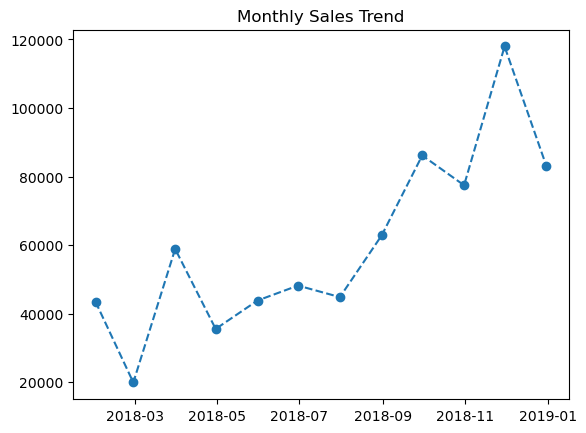

In [51]:
plt.plot(monthly_sales['Month'], monthly_sales['Total Monthly Sales'], marker = 'o', linestyle = '--')
plt.title('Monthly Sales Trend')
     